In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [284]:
fixtures_dir = "../data/processed/fixtures"
gws_dir = "../data/processed/fpl"

pd.set_option("display.max_columns", None)


In [285]:
cal = pd.read_csv("../data/processed/fixtures/2024-2025/fixture_calendar.csv", parse_dates=["date_played"])
stats = pd.read_csv("../data/processed/fpl/2024-2025/gws/merged_gws.csv")

features = pd.read_csv("../data/processed/features/v1/2024-2025/team_form.csv")

In [286]:
missing = features["fbref_id"].isnull().sum()
print(missing)

0


In [287]:
wins = cal[cal["result"] == "W"]["team"].value_counts()
draws = cal[cal["result"] == "D"]["team"].value_counts()

total_points = ((wins * 3) + draws).sort_values(ascending=False)
display(total_points)

team
LIV    84
ARS    74
MCI    71
CHE    69
NEW    66
AVL    66
NFO    65
BHA    61
BOU    56
BRE    56
FUL    54
CRY    53
EVE    48
WHU    43
WOL    42
MUN    42
TOT    38
LEI    25
IPS    22
SOU    12
Name: count, dtype: int64

In [288]:
mun_df = features[features["team"] == "MUN"]

display(mun_df.head())

,fpl_id,fbref_id,gw_orig,gw_played,date_sched,date_played,team,team_id,home,away,home_id,away_id,status,sched_missing,venue,gf,ga,xga,xg,result,is_promoted,is_relegated,ga90_roll5,xga90_roll5,ga90_home_5,ga90_away_5,is_break,ga90_roll5_pct,ga90_roll5_z,ga90_log,ga90_log_z,xga90_roll5_pct,xga90_roll5_z,ga90_home_5_pct,ga90_home_5_z,ga90_away_5_pct,ga90_away_5_z
684,1,cc5b4244,1,1,2024-08-16,2024-08-16,MUN,f4c1be32,MUN,FUL,f4c1be32,1aff263c,finished,1,Home,1,0,0.4,2.4,W,0,0,0.0,0.400000,0.000000,0.000000,0,0.175,-1.225735,0.000000,-1.355690,0.05,-1.511450,0.175,-1.228024,0.175,-1.225676
685,13,fc8ab8b2,2,2,2024-08-24,2024-08-24,MUN,f4c1be32,BHA,MUN,80396060,f4c1be32,finished,1,Away,1,2,2.1,1.4,L,0,0,1.0,1.250000,0.666667,1.333333,0,0.475,-0.222681,0.693147,-0.005481,0.35,-0.288498,0.400,-0.528575,0.600,0.060170
686,27,a7ab7a12,3,3,2024-09-01,2024-09-01,MUN,f4c1be32,MUN,LIV,f4c1be32,84d4105e,finished,1,Home,0,3,1.8,1.4,L,0,0,1.4,1.433333,1.450000,1.600000,0,0.675,0.146912,0.875469,0.323797,0.55,0.004225,0.575,0.112322,0.725,0.321330
687,38,b96c3759,4,4,2024-09-14,2024-09-14,MUN,f4c1be32,SOU,MUN,aaa42142,f4c1be32,finished,1,Away,3,0,1.1,2.6,W,0,0,1.2,1.350000,1.350000,1.100000,1,0.500,-0.088895,0.788457,0.073541,0.55,-0.085192,0.575,-0.012255,0.475,-0.168779
688,43,929e225f,5,5,2024-09-21,2024-09-21,MUN,f4c1be32,CRY,MUN,8ace9f04,f4c1be32,finished,1,Away,0,0,1.0,1.6,D,0,0,1.0,1.280000,1.250000,0.800000,0,0.350,-0.550411,0.693147,-0.471103,0.50,-0.288945,0.475,-0.197246,0.325,-0.778753


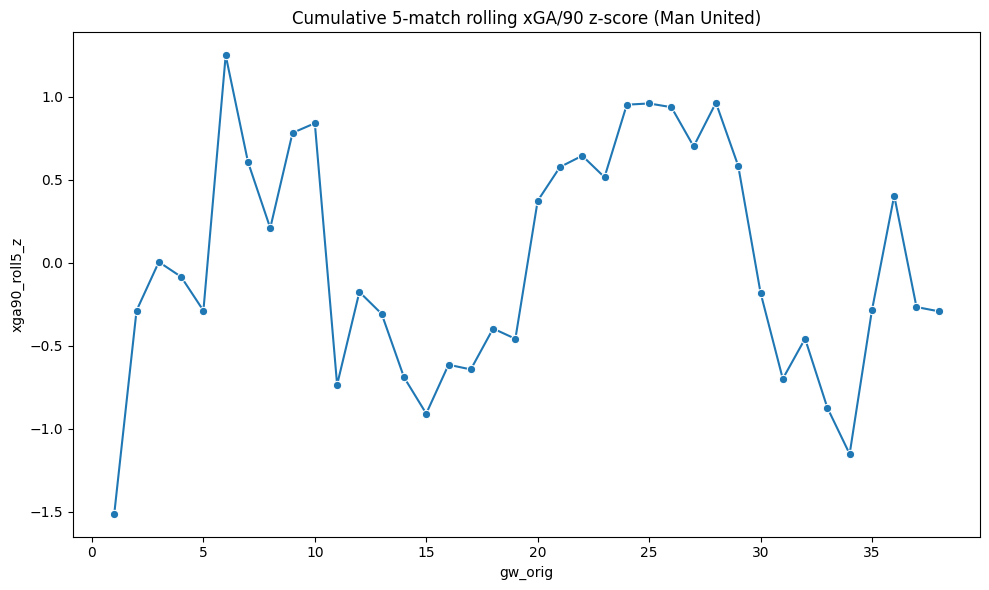

In [289]:
mun_df = mun_df.sort_values("gw_orig")

mun_df["xga90_roll5_z_cum"] = mun_df["xga90_roll5_z"].cumsum()

# 4️⃣  Now plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=mun_df,
    x="gw_orig",                    # gameweek on x
    y="xga90_roll5_z",          # or 'xga90_roll5_z'
    marker="o",
    ax=ax
)
ax.set(title="Cumulative 5-match rolling xGA/90 z-score (Man United)")
plt.tight_layout()
plt.show()

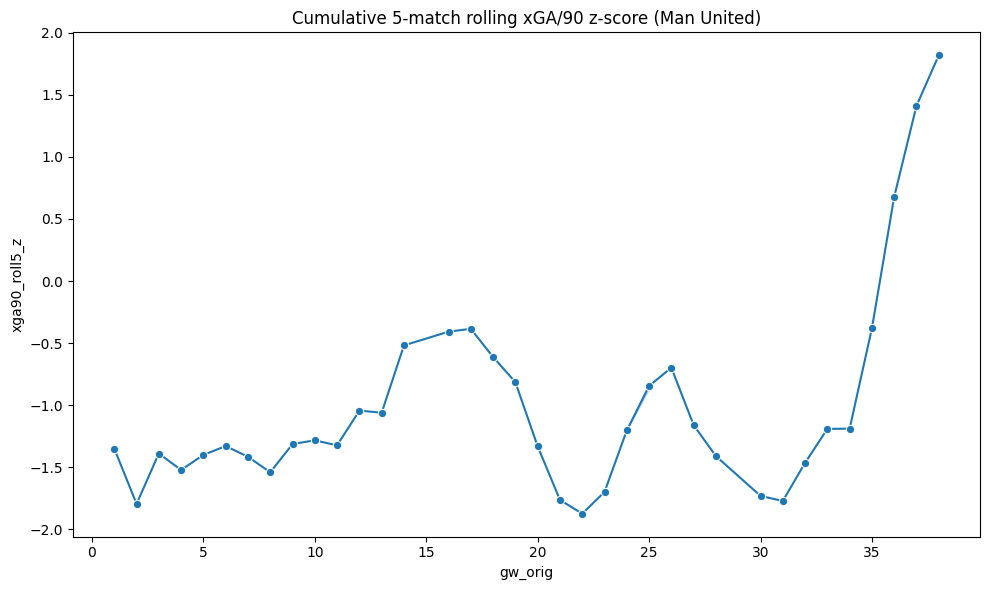

In [290]:
liv_df = features[features["team"] == "LIV"]


liv_df = liv_df.sort_values("gw_orig")

liv_df["xga90_roll5_z_cum"] = liv_df["xga90_roll5_z"].cumsum()

# 4️⃣  Now plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=liv_df,
    x="gw_orig",                    # gameweek on x
    y="xga90_roll5_z",          # or 'xga90_roll5_z'
    marker="o",
    ax=ax
)
ax.set(title="Cumulative 5-match rolling xGA/90 z-score (Man United)")
plt.tight_layout()
plt.show()

In [291]:
# --- 1. keep only the columns we need, then sort inside each team -----------
cols = ["team", "gw_orig", "xga90_roll5_z"]   # add season if multi-season
df_all = (
    features[cols]
    .sort_values(["team", "gw_orig"])
)

# --- 2. cumulative *per team* ---------------------------------------------
df_all["xga90_roll5_z_cum"] = (
    df_all
      .groupby("team", sort=False)["xga90_roll5_z"]
      .cumsum()
)


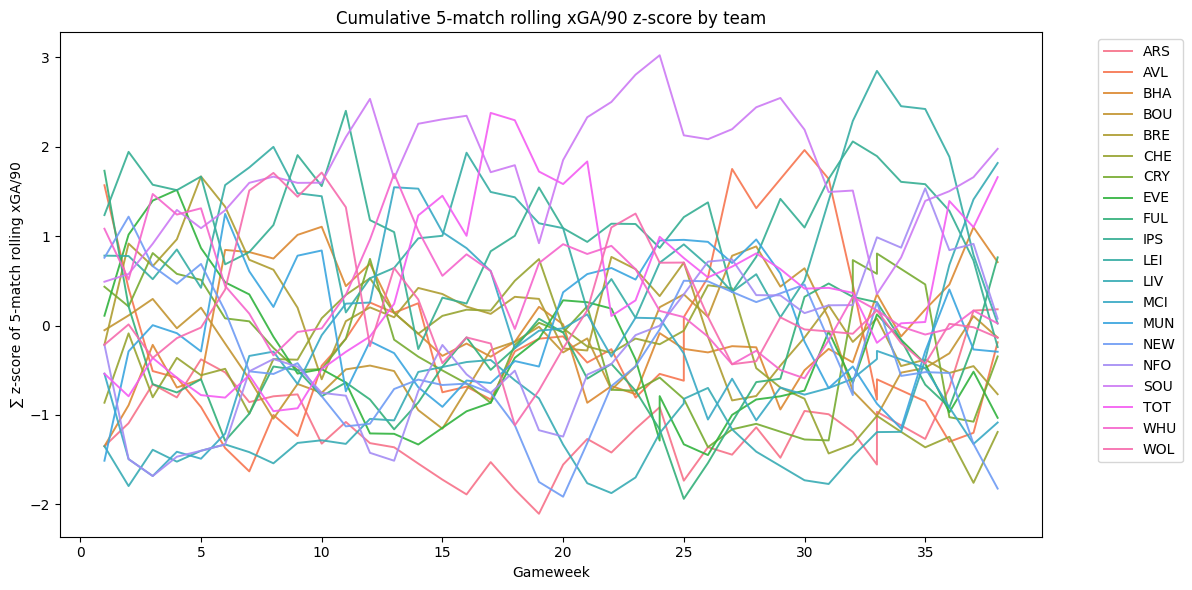

In [292]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=df_all,
    x="gw_orig",
    y="xga90_roll5_z",   # or "xga90_roll5_z" for the rolling mean itself
    hue="team",              # separate colour per team
    estimator=None,          # plot raw lines, no aggregation
    ax=ax,
    linewidth=1.4,
    alpha=0.9
)

ax.set(
    title="Cumulative 5-match rolling xGA/90 z-score by team",
    xlabel="Gameweek",
    ylabel="∑ z-score of 5-match rolling xGA/90"
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # push legend outside
plt.tight_layout()
plt.show()